In [108]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_style("whitegrid")


In [109]:

data = '/home/wbrave1/Desktop/erdos/Bicycle-Safety/data/NCDOT_BikePedCrash.csv'

In [110]:
BikeCrash = pd.read_csv(data)

BikeCrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11266 entries, 0 to 11265
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           11266 non-null  float64
 1   Y           11266 non-null  float64
 2   OBJECTID    11266 non-null  int64  
 3   AmbulanceR  11266 non-null  object 
 4   BikeAge     11266 non-null  object 
 5   BikeAgeGrp  11266 non-null  object 
 6   BikeAlcDrg  11266 non-null  object 
 7   BikeAlcFlg  11266 non-null  object 
 8   BikeDir     11266 non-null  object 
 9   BikeInjury  11266 non-null  object 
 10  BikePos     11266 non-null  object 
 11  BikeRace    11266 non-null  object 
 12  BikeSex     11266 non-null  object 
 13  City        11266 non-null  object 
 14  County      11266 non-null  object 
 15  CrashAlcoh  11266 non-null  object 
 16  CrashDay    11266 non-null  object 
 17  CrashGrp    11266 non-null  object 
 18  CrashHour   11266 non-null  int64  
 19  CrashLoc    11266 non-nul

In [111]:

BikeCrash.head()


,X,Y,OBJECTID,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,...,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,-78.883896,36.039490,1,Yes,11,11-15,.,No,With Traffic,B: Suspected Minor Injury,...,"Two-Way, Divided, Unprotected Median",NaN,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No
1,-78.782800,35.751118,2,Yes,20,20-24,.,No,Facing Traffic,C: Possible Injury,...,"Two-Way, Divided, Unprotected Median",NaN,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
2,-80.697820,35.084732,3,Yes,37,30-39,.,No,Unknown,B: Suspected Minor Injury,...,"Two-Way, Not Divided",NaN,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No
3,-80.479320,35.684400,4,Yes,30,30-39,.,No,With Traffic,C: Possible Injury,...,"Two-Way, Not Divided",NaN,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Cloudy,No
4,-78.904450,34.999428,5,Yes,45,40-49,.,No,With Traffic,B: Suspected Minor Injury,...,"Two-Way, Not Divided",NaN,No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No


In [112]:
# There is a lot of data here. Just looking at the first five cells, RdDefects is NaN everytime. Let's remove the NaNs and see what happens.

BikeCrash = BikeCrash.dropna()

BikeCrash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 9 to 11088
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           165 non-null    float64
 1   Y           165 non-null    float64
 2   OBJECTID    165 non-null    int64  
 3   AmbulanceR  165 non-null    object 
 4   BikeAge     165 non-null    object 
 5   BikeAgeGrp  165 non-null    object 
 6   BikeAlcDrg  165 non-null    object 
 7   BikeAlcFlg  165 non-null    object 
 8   BikeDir     165 non-null    object 
 9   BikeInjury  165 non-null    object 
 10  BikePos     165 non-null    object 
 11  BikeRace    165 non-null    object 
 12  BikeSex     165 non-null    object 
 13  City        165 non-null    object 
 14  County      165 non-null    object 
 15  CrashAlcoh  165 non-null    object 
 16  CrashDay    165 non-null    object 
 17  CrashGrp    165 non-null    object 
 18  CrashHour   165 non-null    int64  
 19  CrashLoc    165 non-null    obje

In [113]:
# oof, taking out the NaN's takes out like 98% of the data. Probably better to just remove the RdDefects column

BikeCrash = pd.read_csv(data)

BikeCrash = BikeCrash.drop(columns=['RdDefects'])

BikeCrash.head()

,X,Y,OBJECTID,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,...,RdConditio,RdConfig,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
0,-78.883896,36.039490,1,Yes,11,11-15,.,No,With Traffic,B: Suspected Minor Injury,...,Dry,"Two-Way, Divided, Unprotected Median",No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No
1,-78.782800,35.751118,2,Yes,20,20-24,.,No,Facing Traffic,C: Possible Injury,...,Dry,"Two-Way, Divided, Unprotected Median",Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No
2,-80.697820,35.084732,3,Yes,37,30-39,.,No,Unknown,B: Suspected Minor Injury,...,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No
3,-80.479320,35.684400,4,Yes,30,30-39,.,No,With Traffic,C: Possible Injury,...,Dry,"Two-Way, Not Divided",Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Cloudy,No
4,-78.904450,34.999428,5,Yes,45,40-49,.,No,With Traffic,B: Suspected Minor Injury,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No


In [114]:
# There is a lot we can do and it is a little overwhelming. I guess the question is, do we want to look at injury severity as a consequence of x,y,z?  Maybe number
# of crashes as a consequence of x,y,z? The second option would have to be relatively measured to something. Maybe we say ideal conditions are clear, high light, dry 
# road. For now I will look at severity of injury.

BikeCrash.groupby('BikeInjury').Weather.describe()

,count,unique,top,freq
BikeInjury,,,,
A: Suspected Serious Injury,577,4,Clear,474
B: Suspected Minor Injury,4660,6,Clear,3894
C: Possible Injury,4338,6,Clear,3529
K: Killed,250,5,Clear,200
O: No Injury,1102,6,Clear,910
Unknown Injury,339,3,Clear,279


<Axes: xlabel='Weather', ylabel='BikeInjury'>

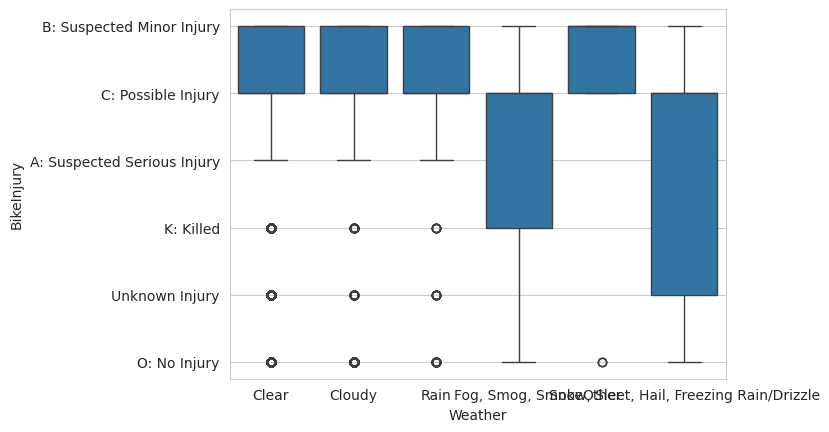

In [115]:
# Okay so we see that injuries of all types were recorded most often on clear wether days. 

sb.boxplot(data = BikeCrash, x = 'Weather', y = 'BikeInjury')

In [116]:
BikeCrash.Weather.value_counts()
BikeCrash.BikeInjury.value_counts()

BikeInjury
B: Suspected Minor Injury      4660
C: Possible Injury             4338
O: No Injury                   1102
A: Suspected Serious Injury     577
Unknown Injury                  339
K: Killed                       250
Name: count, dtype: int64

In [117]:
# If we want to look at injury severity as a function of, well anything really, I think we will need to convert it to a numeric scale. I am thinking:
# 0 = unkown, 1 = no injury, 2 = possible injury, 3 = suspected minor injury, 4 = suspected serious injury, 5 = killed

InjuryCategories = ['Unknown Injury', 'O: No Injury', 'C: Possible Injury', 'B: Suspected Minor Injury', 'A: Suspected Serious Injury', 'K: Killed']

BikeCrash['BikeInjury'] = pd.Categorical(BikeCrash['BikeInjury'], categories=InjuryCategories, ordered=True)

BikeCrash = BikeCrash.sort_values(by='BikeInjury')

BikeCrash

# This cell recasts the BikeInjury series into dtype 'category' and orders it as prescribed at the top of the cell

,X,Y,OBJECTID,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,...,RdConditio,RdConfig,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
11265,-77.922543,34.550857,11266,No,999,Unknown,Missing,Missing,Facing Traffic,Unknown Injury,...,Dry,Unknown,"Driveway, Public",Smooth Asphalt,Coastal,Rural,30 - 35 MPH,No Control Present,Clear,No
2204,-77.789920,35.924282,2205,Yes,19,16-19,.,No,With Traffic,Unknown Injury,...,Wet,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,No Control Present,Rain,No
10020,-79.851048,36.112017,10021,Yes,999,Unknown,Missing,Missing,With Traffic,Unknown Injury,...,Dry,"Two-Way, Not Divided",Related To Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No
10903,-82.329239,35.616796,10904,No,999,Unknown,Missing,Missing,With Traffic,Unknown Injury,...,Dry,"Two-Way, Not Divided",Four-Way Intersection,Smooth Asphalt,Mountains,Urban,30 - 35 MPH,Stop Sign,Cloudy,No
2257,-77.793310,34.211517,2258,No,32,30-39,.,No,With Traffic,Unknown Injury,...,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Coastal,Rural,20 - 25 MPH,No Control Present,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,-81.064667,35.564454,10236,Yes,57,50-59,No,No,With Traffic,K: Killed,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Piedmont,Rural,50 - 55 MPH,No Control Present,Clear,No
3901,-77.407792,35.657041,3902,Yes,22,20-24,Unknown,Unknown,Facing Traffic,K: Killed,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,Rural,40 - 45 MPH,No Control Present,Clear,No
10443,-77.247689,36.207053,10444,Yes,67,60-69,No,No,With Traffic,K: Killed,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,Rural,50 - 55 MPH,No Control Present,Clear,No
9051,-76.610983,36.434880,9052,Yes,60,60-69,Unknown,Unknown,With Traffic,K: Killed,...,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Coastal,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Cloudy,No


In [118]:
# This cell will cast all of the different injury types to correspond with the numbers as prescribed in the preceeding cell

cat_columns = BikeCrash.select_dtypes(['category']).columns

cat_columns

BikeCrash[cat_columns] = BikeCrash[cat_columns].apply(lambda x: x.cat.codes)

BikeCrash

,X,Y,OBJECTID,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,...,RdConditio,RdConfig,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
11265,-77.922543,34.550857,11266,No,999,Unknown,Missing,Missing,Facing Traffic,0,...,Dry,Unknown,"Driveway, Public",Smooth Asphalt,Coastal,Rural,30 - 35 MPH,No Control Present,Clear,No
2204,-77.789920,35.924282,2205,Yes,19,16-19,.,No,With Traffic,0,...,Wet,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,No Control Present,Rain,No
10020,-79.851048,36.112017,10021,Yes,999,Unknown,Missing,Missing,With Traffic,0,...,Dry,"Two-Way, Not Divided",Related To Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Cloudy,No
10903,-82.329239,35.616796,10904,No,999,Unknown,Missing,Missing,With Traffic,0,...,Dry,"Two-Way, Not Divided",Four-Way Intersection,Smooth Asphalt,Mountains,Urban,30 - 35 MPH,Stop Sign,Cloudy,No
2257,-77.793310,34.211517,2258,No,32,30-39,.,No,With Traffic,0,...,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Coastal,Rural,20 - 25 MPH,No Control Present,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,-81.064667,35.564454,10236,Yes,57,50-59,No,No,With Traffic,5,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Piedmont,Rural,50 - 55 MPH,No Control Present,Clear,No
3901,-77.407792,35.657041,3902,Yes,22,20-24,Unknown,Unknown,Facing Traffic,5,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,Rural,40 - 45 MPH,No Control Present,Clear,No
10443,-77.247689,36.207053,10444,Yes,67,60-69,No,No,With Traffic,5,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,Rural,50 - 55 MPH,No Control Present,Clear,No
9051,-76.610983,36.434880,9052,Yes,60,60-69,Unknown,Unknown,With Traffic,5,...,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Coastal,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Cloudy,No


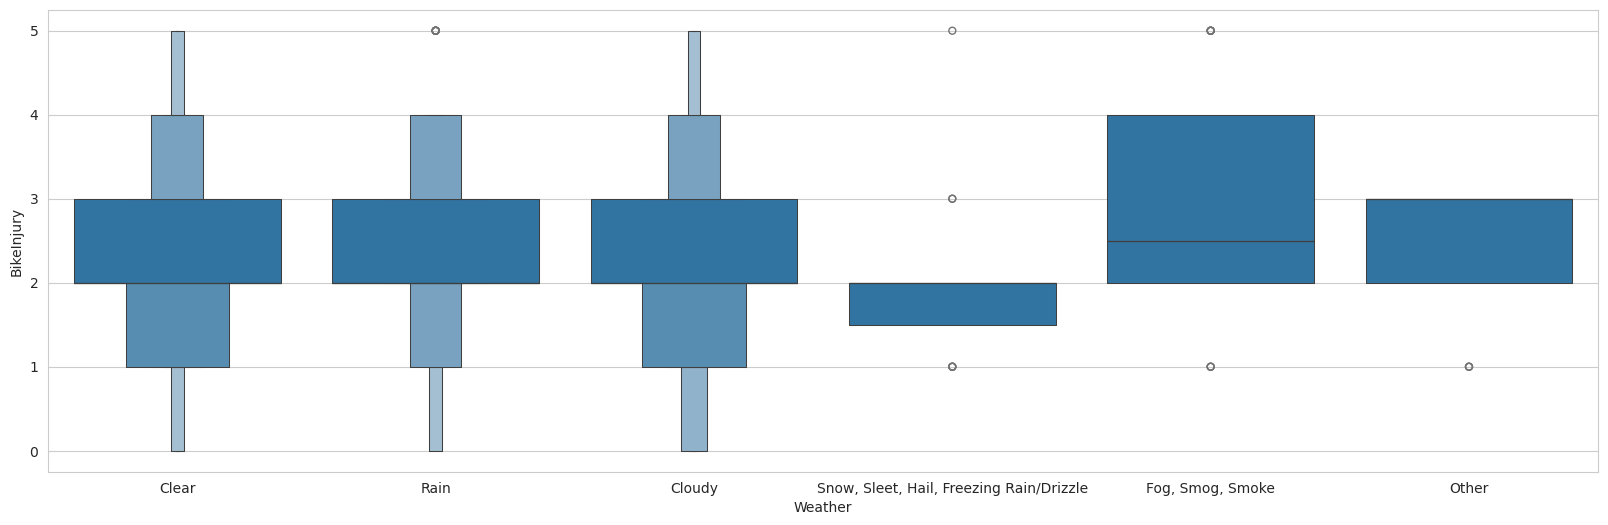

In [119]:
plt.figure(figsize=(20, 6))
sb.boxenplot(data = BikeCrash, x = 'Weather', y = 'BikeInjury')
plt.show()

In [120]:
BikeCrash.SpeedLimit.value_counts()

SpeedLimit
30 - 35  MPH    4488
40 - 45  MPH    2408
20 - 25  MPH    1867
50 - 55  MPH    1278
5 - 15 MPH       634
Unknown          562
60 - 75 MPH       29
Name: count, dtype: int64

In [123]:
SpeedLimitCategories = ['Unknown', '5 - 15 MPH', '20 - 25  MPH', '30 - 35  MPH', '40 - 45  MPH', '50 - 55  MPH', '60 - 75 MPH']

BikeCrash['SpeedLimit'] = pd.Categorical(BikeCrash['SpeedLimit'], categories=SpeedLimitCategories, ordered=True)

BikeCrash = BikeCrash.sort_values(by='SpeedLimit')

cat_columns = BikeCrash.select_dtypes(['category']).columns

BikeCrash[cat_columns] = BikeCrash[cat_columns].apply(lambda x: x.cat.codes)

BikeCrash

,X,Y,OBJECTID,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,...,RdConditio,RdConfig,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone
10867,-78.648583,35.725320,10868,Yes,53,50-59,No,No,With Traffic,4,...,Dry,"Two-Way, Divided, Unprotected Median",Four-Way Intersection,Coarse Asphalt,Piedmont,Urban,0,Stop And Go Signal,Clear,No
625,-79.733120,36.087670,626,Yes,19,16-19,.,No,Facing Traffic,3,...,Dry,"Two-Way, Divided, Positive Median Barrier",No Special Feature,Smooth Asphalt,Piedmont,Rural,0,No Control Present,Clear,No
4843,-77.032737,35.546545,4844,Yes,47,40-49,No,No,Facing Traffic,2,...,Wet,"Two-Way, Not Divided",Missing,Coarse Asphalt,Coastal,Urban,0,No Control Present,Cloudy,No
5359,-77.394184,34.785867,5360,Yes,8,6-10,No,No,Not Applicable,3,...,Dry,"Two-Way, Not Divided",Traffic Circle/Roundabout,Smooth Asphalt,Coastal,Urban,0,Stop Sign,Clear,No
8633,-79.539469,36.104892,8634,No,34,30-39,Unknown,Unknown,Not Applicable,2,...,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Piedmont,Urban,0,No Control Present,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,-77.466020,35.353960,1894,Yes,35,30-39,.,No,With Traffic,5,...,Wet,"Two-Way, Divided, Unprotected Median",No Special Feature,Smooth Asphalt,Coastal,Rural,6,No Control Present,Cloudy,No
4905,-79.279159,35.247052,4906,Yes,26,25-29,No,No,With Traffic,3,...,Dry,"Two-Way, Divided, Positive Median Barrier",No Special Feature,Smooth Asphalt,Piedmont,Rural,6,No Control Present,Clear,No
5431,-81.945696,35.309495,5432,Yes,24,20-24,No,No,With Traffic,3,...,Wet,"Two-Way, Divided, Positive Median Barrier",No Special Feature,Coarse Asphalt,Mountains,Rural,6,No Control Present,Rain,No
9916,-80.835065,35.272084,9917,Yes,44,40-49,No,No,With Traffic,2,...,Dry,"One-Way, Not Divided",On or Off Ramp,Smooth Asphalt,Piedmont,Urban,6,No Control Present,Cloudy,No


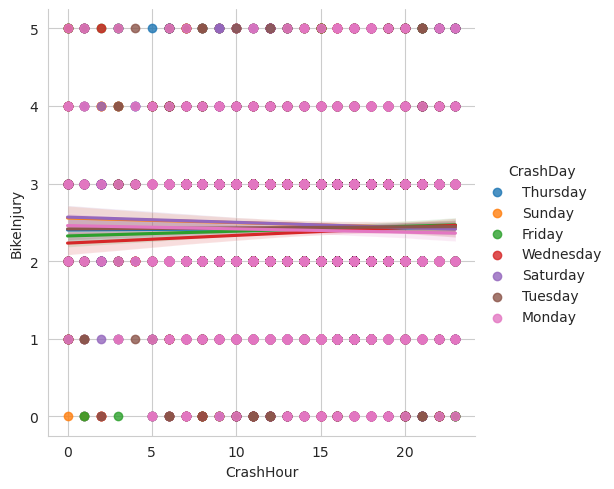

In [132]:
sb.lmplot(data=BikeCrash, x = 'CrashHour', y = 'BikeInjury', hue='CrashDay')

In [1]:
# The goal is to provide a relative danger estimation. Think of qualities that can be use to estimate danger likelihood and injury severity. Off of the top of my hed:
# weather, age, light condition, road condition, intersection type, vehicle type, number of lanes, speed, traffic control